In [1]:
import sys 
sys.path.append('/Users/willknott/Desktop/DIS/coursework/pds/wdk24/src')
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt

### 1 signal

In [6]:
from distributions import total_pdf 
from generation import generate_from_total_pdf

true_params = {'f': 0.1, 'lam': 0.5, 'mu': 5.28, 'sigma': 0.018}
starting_params={'f': 0.231, 'lam': 1.056, 'mu': 5.433, 'sigma': 0.03195}

# np.random.seed(42)
N_events = 700
dataset = generate_from_total_pdf(N_events)

In [7]:
import pickle 

# Save the data to a pickle file
with open('issue_dataset.pkl', 'wb') as file:
    pickle.dump(dataset, file)

Unbinned
True 6.4322145314843375 6.287903531188022e-11


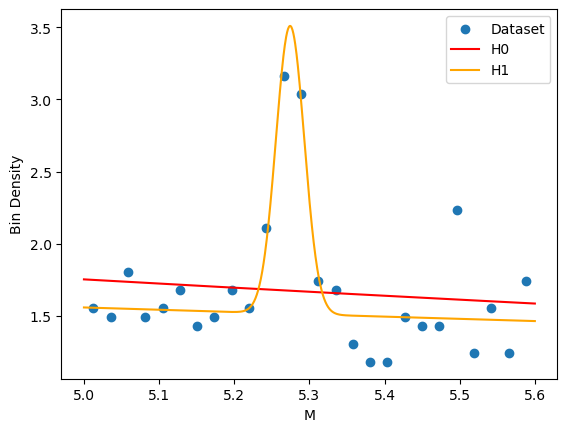

In [8]:
from distributions import total_cdf, total_pdf
from hypothesis_test import signal_background_test
import pandas as pd

file_path = 'issue_dataset.pkl'
data = pd.read_pickle(file_path)
data == dataset

print('Unbinned')
fig, discovery, Z, p_value = signal_background_test(
                                data, 
                                pdf=total_pdf,
                                cdf=total_cdf, 
                                starting_params=starting_params,
                                binned=True,
                                plot=True
                                )

print(discovery, Z, p_value)

Unbinned
True 6.447502986678045 5.6853965979541954e-11


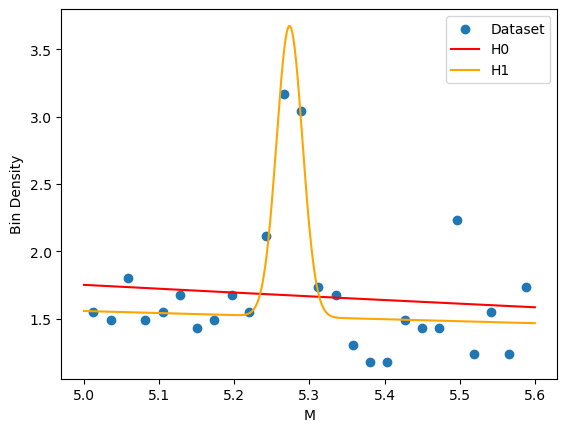

In [9]:
from distributions import total_cdf, total_pdf
from hypothesis_test import signal_background_test

print('Unbinned')
fig, discovery, Z, p_value = signal_background_test(
                                dataset, 
                                pdf=total_pdf,
                                cdf=total_cdf, 
                                starting_params=starting_params,
                                binned=False,
                                plot=True
                                )

print(discovery, Z, p_value)

Binned
True 6.431659076307555 6.310929556718747e-11


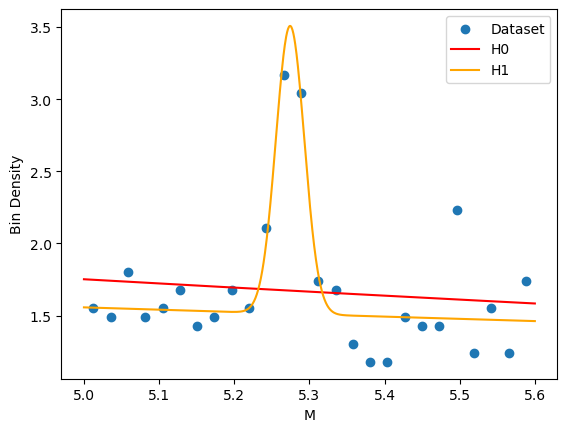

In [10]:
from distributions import total_cdf, total_pdf
from hypothesis_test import signal_background_test

starting_params={'f': 0.1, 'lam': 0.5, 'mu': 5.28, 'sigma': 0.018}

print('Binned')
fig, discovery, Z, p_value = signal_background_test(
                                dataset, 
                                pdf=total_pdf,
                                cdf=total_cdf, 
                                starting_params=true_params,
                                binned=True,
                                plot=True
                                )

print(discovery, Z, p_value)

### 2 signal test

In [14]:
from generation import generate_from_two_signal_pdf

starting_params = {'f1': 0.1, 'f2': 0.05, 'lam': 0.5, 'mu1': 5.28, 'mu2': 5.35, 'sigma': 0.018}

N_events = 1000
two_signal_dataset = generate_from_two_signal_pdf(N_events)

In [17]:
from hypothesis_test import two_signal_test
from distributions import two_signal_pdf, two_signal_cdf

fig, discovery, Z, p_value = two_signal_test(
                                two_signal_dataset,
                                pdf=two_signal_pdf,
                                cdf=two_signal_cdf,
                                starting_params=starting_params,
                                binned=False,
                                plot=True
                                )

print('unbinned:', discovery, Z, p_value)

T: 22.030578655475665
unbinned: False 4.549912516948308 2.683411177151207e-06


T: 14.143522950217857
binned: False 3.583702049495735 0.00016937924652171699


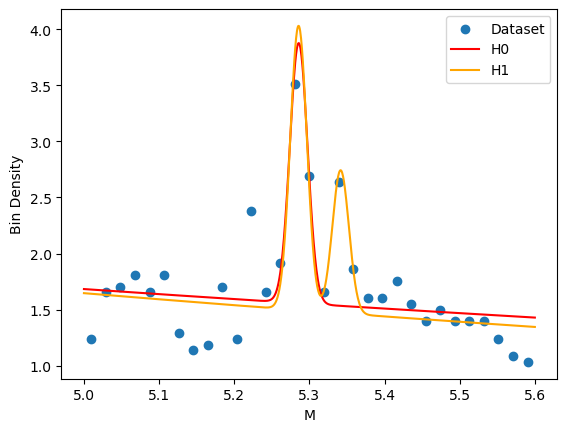

In [13]:
fig, discovery, Z, p_value = two_signal_test(
                                two_signal_dataset,
                                pdf=two_signal_pdf,
                                cdf=two_signal_cdf,
                                starting_params=starting_params,
                                binned=True,
                                plot=True
                                )

print('binned:', discovery, Z, p_value)